In [ ]:
#   https://www.kaggle.com/datasets/salader/dogs-vs-cats
#   from the following link you can download the dataset 
#   it is present in Kaggle
#   https://github.com/Rvaibhavv/deep_learning/blob/main/CatVsDog.ipynb

In [1]:
import zipfile
zip_ref =zipfile.ZipFile('C:/Users/rvaib/Downloads/archive (1).zip')
zip_ref.extractall('C:/Users/rvaib/onedrive/Desktop/deep_learning/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization


In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='C:/Users/rvaib/OneDrive/Desktop/deep_learning/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='C:/Users/rvaib/OneDrive/Desktop/deep_learning/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# normalizing the image from '0 - 255' to 0-1
def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)

In [20]:
model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
   
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1,activation='sigmoid')

])



In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

_________________________________________________________________


In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']


)
history =model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 109ms/step - loss: 0.9993 - accuracy: 0.6082 - val_loss: 0.6036 - val_accuracy: 0.6698
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5550 - accuracy: 0.7188 - val_loss: 0.5506 - val_accuracy: 0.7262
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4843 - accuracy: 0.7663 - val_loss: 0.4453 - val_accuracy: 0.7946
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4133 - accuracy: 0.8120 - val_loss: 0.6148 - val_accuracy: 0.7212
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3557 - accuracy: 0.8396 - val_loss: 0.5037 - val_accuracy: 0.7780
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2738 - accuracy: 0.8830 - val_loss: 0.3915 - val_accuracy: 0.8320
Epoch 7/10
625/625 [==============================] - 71s 113ms/step - loss: 0.1923 - accuracy: 0.9230 - val_loss: 0.6163 - val_ac

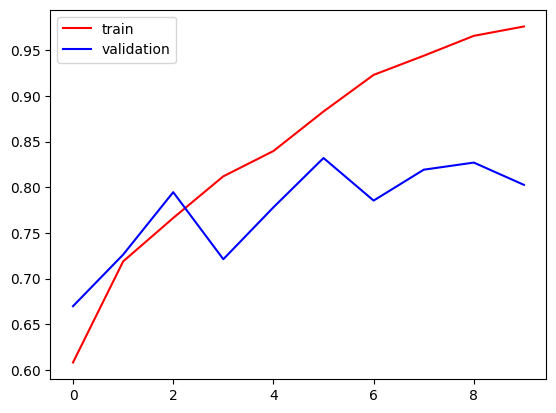

In [23]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


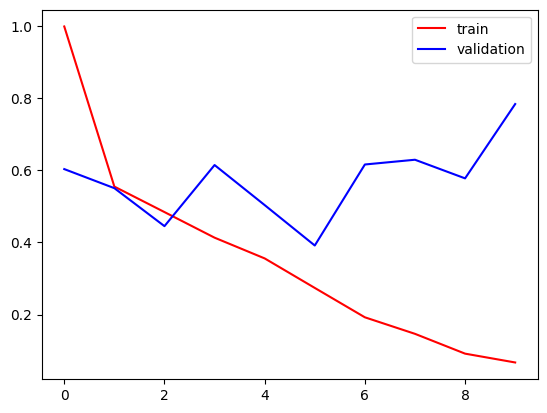

In [24]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()